# This notebook visualizes the results of experiments on the MNIST dataset to find adequate personalization ratios for different budget combinations.

Organize imports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
import seaborn as sns
from ast import literal_eval

Load results of votings of experiments to find adequate personalization ratios.

In [2]:
df = pd.read_csv('../find_ratios/results_voting.csv', header=0)

Plot ratios of DP costs of two different groups of sensitive data over the voting history for different variants and personalization ratios.

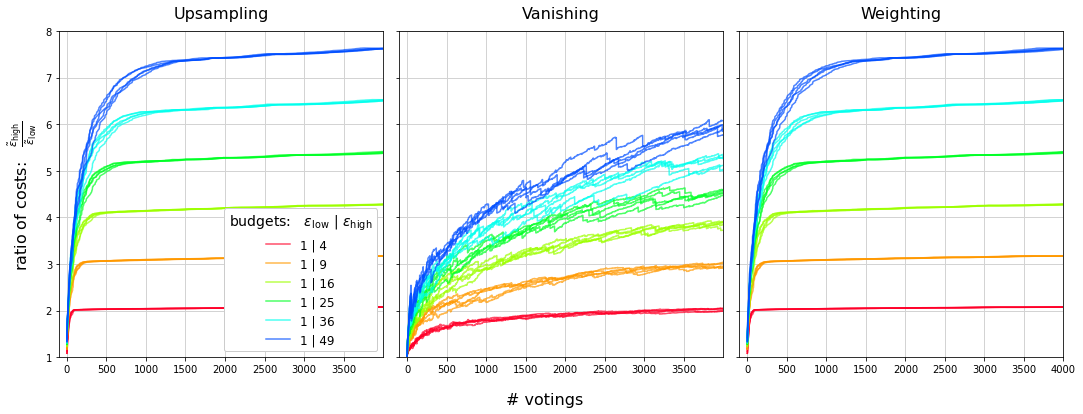

In [10]:
epsilons = np.array([str((1, x ** 2)) for x in [2, 3, 4, 5, 6, 7]])
n_eps = len(epsilons)

df = df[
    (df['epsilons'] == epsilons[0]) | (df['epsilons'] == epsilons[1]) |
    (df['epsilons'] == epsilons[2]) | (df['epsilons'] == epsilons[3]) |
    (df['epsilons'] == epsilons[4]) | (df['epsilons'] == epsilons[5])
]

delta = 1e-5
cmap = get_cmap('gist_rainbow')
collectors = np.unique(df['collector'])

limit = 1000

plt.rcParams['axes.titley'] = 1.02
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0)

axes[0].set_ylabel('ratio: costs1 / costs0')
axes[1].set_ylabel('ratio: costs1 / costs0')
axes[2].set_ylabel('ratio: costs1 / costs0')
axes[0].set_title('Upsampling', fontsize=16)
axes[1].set_title('Vanishing', fontsize=16)
axes[2].set_title('Weighting', fontsize=16)
    
labels_list = [[], [], []]
for row in range(len(df)):
    data = df.iloc[row]
    costs0 = np.array(literal_eval(data['costs_curve']))[:, 0]
    costs1 = np.array(literal_eval(data['costs_curve']))[:, -1]
    ratios = costs1 / costs0
    eps = data['epsilons']
    collector = data['collector']
    i = 0
    if collector == 'vGNMax':
        i = 1
    elif collector == 'wGNMax':
        i = 2
    ax = axes[i]
    color = int(np.arange(n_eps)[epsilons == eps])
    t = 0.2
    sns.lineplot(x=np.arange(len(ratios)), y=ratios, ax=ax, color=cmap(color / (n_eps + 1)), zorder=2,
                 label=eps if eps not in labels_list[i] else '', alpha=0.7)
    labels_list[i].append(eps)
for i in [0, 1, 2]:
    ax = axes[i]
    ax.set_xlabel('#votings')
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax.grid(which='major', axis='both', color='lightgray', linewidth=1, zorder=1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-100, 4000)
    ax.set_ylim(1, 8)
    ax.set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500])
    if i == 2:
        ax.set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        labels = ['1 | 4', '1 | 9', '1 | 16', '1 | 25', '1 | 36', '1 | 49']
        ax.legend(handles, labels, title=r'budgets:   $\varepsilon_{\mathrm{low}}$ | $\varepsilon_{\mathrm{high}}$',
                  title_fontsize=14, loc='lower right', framealpha=1, fontsize=12)
    else:
        ax.get_legend().remove()
fig.supylabel(r'ratio of costs:   $\frac{\tilde{\varepsilon}_{\mathrm{high}}}{\tilde{\varepsilon}_{\mathrm{low}}}$',
              fontsize=16, x=0.085, y=0.5)
fig.supxlabel('# votings', fontsize=16, x=0.5, y=0.01)
plt.savefig(fname='find_ratios.pdf', format='pdf')
plt.show()